In [1]:
%load_ext autoreload
%autoreload 2

In [17]:
import tensorflow as tf
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
import sys
sys.path.append('..')
from dataset import batcher

In [19]:
MODEL_DIR = '../saved_models/'
LR_RATE = 0.001
OPT = tf.keras.optimizers.Adam(learning_rate=LR_RATE)
LOSS = 'MeanSquaredError'
METRICS = ['RootMeanSquaredError']

In [22]:
# Get test split
test_batcher = batcher.Batcher(country_year="ethiopia-2018", bucket=False, shuffle=False, split='test', repeat=1, batch_size=652).get_dataset()
x_true = []
y_true = []
for x, y in test_batcher:
    x_true.append(x)
    y_true.append(y)

print(np.shape(x_true))

(1, 652, 224, 224, 8)


In [23]:
# Load model
experiments = ['imagery_sample_vgg_regression_ms_nl_200epochs']

def load_model_from_dir(model_name):
    model_path = MODEL_DIR + model_name + '.h5'
    model = tf.keras.models.load_model(model_path, compile=False)
    
    return model

In [24]:
# Get consumption predictions
trained_model = load_model_from_dir(experiments[0])
trained_model.compile(
            loss=LOSS,
            optimizer=OPT,
            metrics=METRICS,
        )

y_preds = trained_model.predict_on_batch(x_true)
print(y_preds)

2023-02-12 18:44:53.118091: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[[ 1.3737752e+00]
 [ 2.8106794e-01]
 [-3.8079083e-01]
 [ 2.8932264e-02]
 [ 1.4979351e+00]
 [ 2.4110751e-01]
 [ 4.2988634e-01]
 [-2.8859124e-01]
 [-4.0962350e-01]
 [ 3.8003474e-03]
 [-5.5814016e-01]
 [ 9.4187260e-01]
 [-3.0287823e-01]
 [-3.4084955e-01]
 [ 1.0650835e+00]
 [-1.9992988e-01]
 [-1.5213221e-01]
 [-5.1272207e-01]
 [-2.6025411e-01]
 [-3.5329644e-02]
 [-1.4765449e-02]
 [-3.7190428e-01]
 [ 1.3737752e+00]
 [-5.0943132e-02]
 [-9.1911033e-02]
 [-4.4764435e-01]
 [-4.8933738e-01]
 [ 1.3087471e-01]
 [-3.0316266e-01]
 [-1.4113510e-01]
 [-6.2155861e-01]
 [ 1.6705827e+00]
 [-6.9028959e-02]
 [-4.5605758e-01]
 [ 1.6416842e-01]
 [-5.5991113e-01]
 [-8.7462626e-03]
 [-5.4629403e-01]
 [-3.0091357e-01]
 [ 4.5761997e-01]
 [ 5.3519803e-01]
 [-4.0957695e-01]
 [-1.5232073e-01]
 [-4.4238752e-01]
 [-2.0196374e-01]
 [ 1.1661452e-01]
 [ 7.0603657e-01]
 [-4.0578631e-01]
 [ 2.5232989e-01]
 [-2.6302558e-01]
 [-5.3808516e-01]
 [-5.4479921e-01]
 [-6.0963708e-01]
 [-4.0489737e-02]
 [ 1.8411331e-02]
 [-2.05396

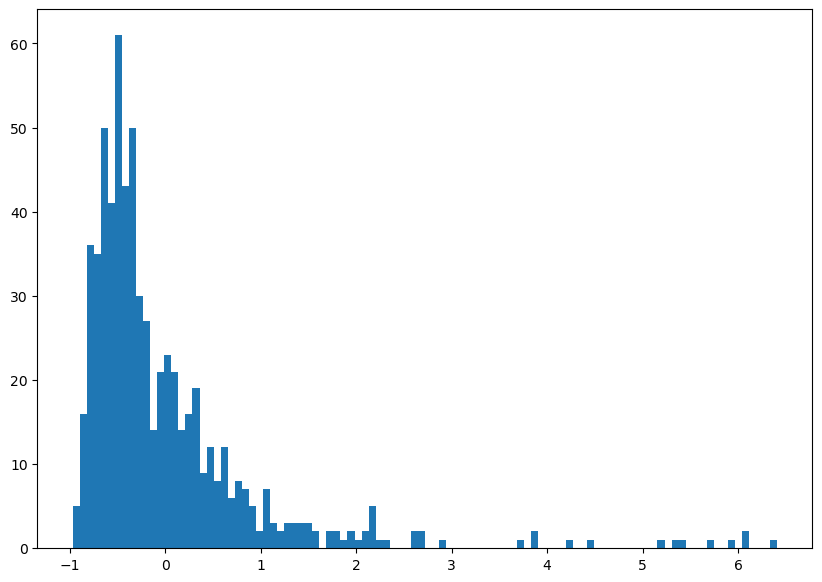

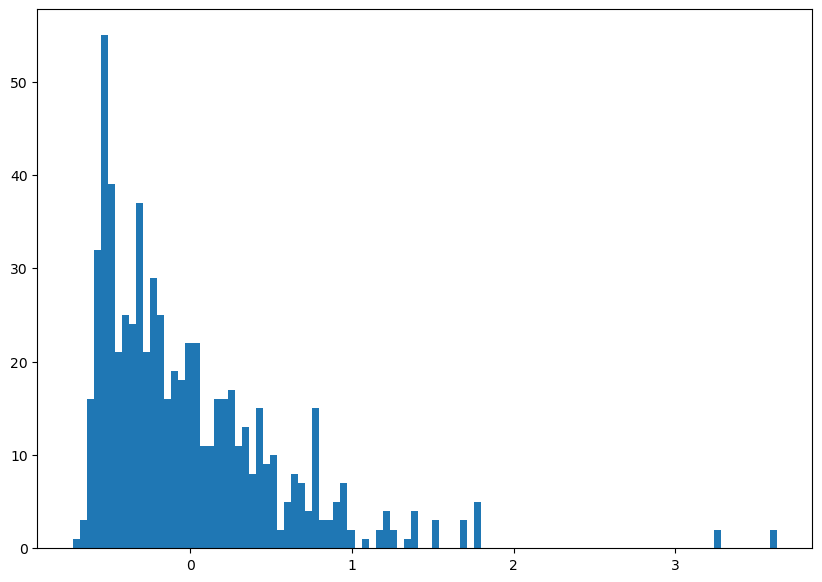

In [25]:
# Find r-squared
y_true = np.squeeze(y_true)
y_preds = np.squeeze(y_preds)

# Plot histograms
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(y_true, bins = 100)
plt.show()

fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(y_preds, bins = 100)
plt.show()


r2 = pearsonr(y_true, y_preds)[0]

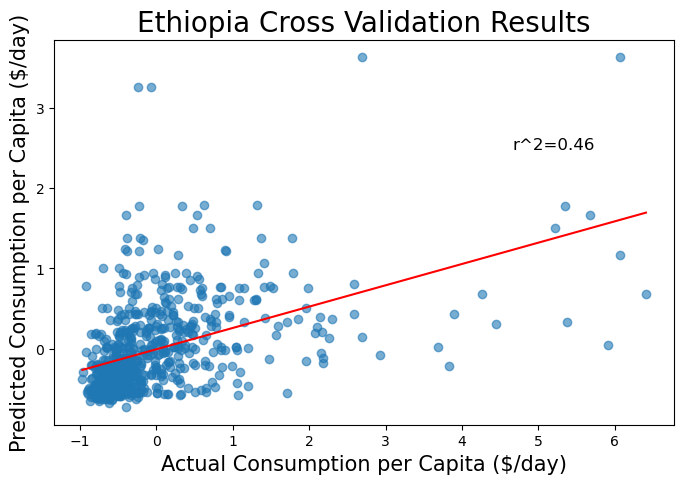

In [26]:
# Plot predictions
country = 'Ethiopia'
fig = plt.figure(figsize=(8,5))
plt.scatter(y_true, y_preds, alpha=0.6)
plt.plot(np.unique(y_true), np.poly1d(np.polyfit(y_true, y_preds, 1))(np.unique(y_true)), color='red')
plt.text(0.5, 0.5, f'r^2={round(r2, 2)}', ha='left', va='top', size=12, transform=ax.transAxes)
plt.xlabel('Actual Consumption per Capita ($/day)', fontsize=15)
plt.ylabel('Predicted Consumption per Capita ($/day)', fontsize=15)
plt.title(f'{country} Cross Validation Results', fontsize=20)
# plt.xlim([np.min(y_true), 10])
# plt.ylim([np.min(y_true), 10])
plt.show()